# Mini-Project: SVM&LR Classification
You are to perform predictive analysis (classification) upon a data set: model the dataset using
methods we have discussed in class: logistic regression & support vector machines and making
conclusions from the analysis. Follow the CRISP-DM framework in your analysis (you are not
performing all of the CRISP-DM outline, only the portions relevant to the grading rubric outlined
below). This report is worth 10% of the final grade. You may complete this assignment in teams
of as many as three people.
Write a report covering all the steps of the project. The format of the document can be PDF,
*.ipynb, or HTML. You can write the report in whatever format you like, but it is easiest to turn in
the rendered Jupyter notebook. The results should be reproducible using your report. Please
carefully describe every assumption and every step in your report.
A note on grading: A common mistake I see in this lab is not investigating different input
parameters for each model. Try a number of parameter combinations and discuss how the model changed. 

## SVM and Logistic Regression Modeling


### Create Models [50 points] 
Create a logistic regression model and a support vector machine model for the
classification task involved with your dataset. Assess how well each model performs (use
80/20 training/testing split for your data). Adjust parameters of the models to make them
more accurate. If your dataset size requires the use of stochastic gradient descent, then
linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing
logistic regression and linear support vector machines. For many problems, SGD will be
required in order to train the SVM model in a reasonable timeframe.   

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [0]:
#read data from github repository
#this data was produced from the Iowa Alcohol Dataset 2019 year data
#It was cleansed and transformed in this notebook and exported as a csv to github for use here.
#source python notebook: https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/lab1/msds7331_clark_schueder_vela_washburn.ipynb
# read csv from github directly
url_dataset = 'https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/Live%20Assignment%201/df1hotmerge2.csv?raw=true'
#df = pd.read_csv(url_dataset, nrows=50000)
data = pd.read_csv(url_dataset, nrows=100000)

In [42]:
print(data.shape)
print(list(data.columns))

(100000, 68)
['Unnamed: 0', 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'counter', 'liquor_category', 'store_parent', 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'liquor_category_WHISKY', 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'year_2019', 'monthyear_Apr-2019', 'monthyear_Aug-2019', 'monthyear_De

In [43]:
data = data.drop(columns = ['Unnamed: 0'])
count_not_whiskey = len(data[data['liquor_category_WHISKY']==0])
count_whiskey = len(data[data['liquor_category_WHISKY']==1])
pct_of_no_whiskey = count_not_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of not whiskey is", pct_of_no_whiskey*100)
pct_of_whiskey = count_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of whiskey", pct_of_whiskey*100)

percentage of not whiskey is 77.35499999999999
percentage of whiskey 22.645


In [44]:
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep=['sale_dollars_trans', 'cost_per_liter', 'cost_per_liter_trans',
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack', 'bottle_volume_ml','liquor_category_WHISKY']
data_final=data[to_keep]
data_final.columns.values

array(['sale_dollars_trans', 'cost_per_liter', 'cost_per_liter_trans',
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack', 'bottle_volume_ml',
       'liquor_category_WHISKY'], dtype=object)

#### Logistic Regression model:

In [122]:
X = data_final.loc[:, data_final.columns != 'liquor_category_WHISKY']
y = data_final.loc[:, data_final.columns == 'liquor_category_WHISKY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns


from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = linear_model.LogisticRegressionCV( Cs=100)# class_weight = 'balanced')

logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

LogisticRegressionCV(Cs=100, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [123]:
coef = logisticRegr.coef_[0]
classes = logisticRegr.classes_[0]
intercept = logisticRegr.intercept_[0]
print (coef)

[ 6.10228399e-01 -6.34634907e-03  4.94938287e-01  1.38505521e+00
 -7.20933197e-01  1.15290112e-01  9.93896796e-04 -1.65396595e-03]


In [124]:
intercept

-6.39004031115626

In [125]:
# Returns a NumPy Array
predictions = logisticRegr.predict(X_test)

params =logisticRegr.get_params(deep=True)
params

{'Cs': 100,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [126]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.85125


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print("Confusion Matrix: ", '\n', cm)

Confusion Matrix:  
 [[14980   546]
 [ 2429  2045]]


ROC Curves and AUC in Python
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

When to Use ROC vs. Precision-Recall Curves? Generally, the use of ROC curves and precision-recall curves are as follows:

ROC curves should be used when there are roughly equal numbers of observations for each class. Precision-Recall curves should be used when there is a moderate to large class imbalance.

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logisticRegr.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.886


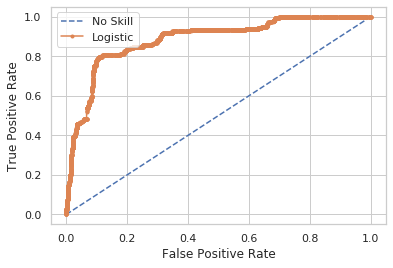

In [52]:
from matplotlib import pyplot
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]

Logistic: f1=0.579 auc=0.706


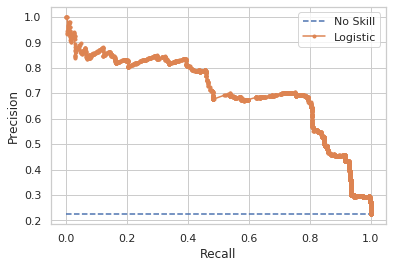

In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict probabilities
lr_probs = logisticRegr .predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logisticRegr .predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]
no_skill = ycnt.values[0] / len(y_test)
#no_skill = len(y_test[y_test==1]) / len(y_test)
no_skill
#no_skill = 0.2
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = data_final.loc[:, data_final.columns != 'liquor_category_WHISKY']
y = data_final.loc[:, data_final.columns == 'liquor_category_WHISKY']

# Separating out the features
# = data.iloc[:, : 8].values
# Separating out the target
# = data.loc[:,['liquor_category_WHISKY']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
xss = StandardScaler().fit_transform(x)
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
#             , columns = ['principal component 1', 'principal component 2', '3',
#                         '4', '5'])


pca.explained_variance_ratio_
finalDf = pd.concat([principalDf, data[['liquor_category_WHISKY']]], axis = 1)

In [60]:
pca.explained_variance_ratio_

array([4.04210645e-01, 2.90581471e-01, 1.95483332e-01, 6.24617071e-02,
       4.01164982e-02, 7.11240764e-03, 3.39384042e-05, 8.16575257e-21])

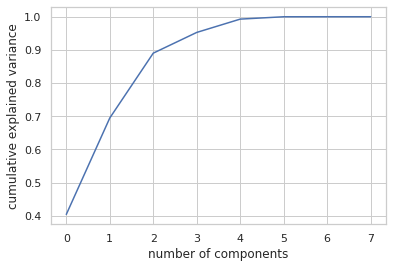

In [63]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Logistic regression with PCA

In [0]:
#x = finalDf.loc[:, finalDf.columns != 'liquor_category_WHISKY']
y = finalDf.loc[:, finalDf.columns == 'liquor_category_WHISKY']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#columns = X_train.columns

In [65]:
#X = data_final.loc[:, data_final.columns != 'liquor_category_WHISKY']
#y = data_final.loc[:, data_final.columns == 'liquor_category_WHISKY']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#columns = X_train.columns


from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = linear_model.LogisticRegressionCV(Cs=100)

logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=100, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
# Returns a NumPy Array
predictions = logisticRegr.predict(X_test)

In [67]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.84405


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print("Confusion Matrix: ", '\n', cm)

Confusion Matrix:  
 [[15049   477]
 [ 2642  1832]]


In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logisticRegr.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.884


Logistic: f1=0.540 auc=0.703


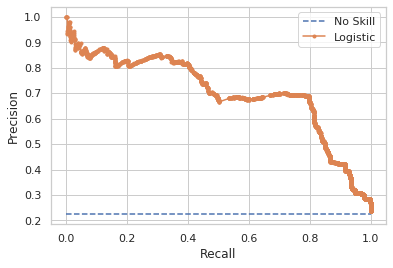

In [70]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
lr_probs = logisticRegr .predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logisticRegr .predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]
no_skill = ycnt.values[0] / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Support Vector Machine Model:

In [107]:
#possibility to scale it?
from sklearn.svm import LinearSVC
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

# all parameters not specified are set to their defaults
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
from sklearn.svm import SVC
#svclassifier = SVC(kernel='poly', degree=8)
#svclassifier = SVC(kernel='rbf')
#svclassifier = SVC(kernel='linear', random_state=0)
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
svclassifier = LinearSVC(C=100)
model = svclassifier.fit(X_std, y_train)
model

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

can adjust costs per error to help you redraw the line in different ways to find the optimial accuracy.

In [108]:
# Returns a NumPy Array
predictions = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[13093  2433]
 [  857  3617]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     15526
           1       0.60      0.81      0.69      4474

    accuracy                           0.84     20000
   macro avg       0.77      0.83      0.79     20000
weighted avg       0.86      0.84      0.84     20000



In [0]:
#testing another set
url_dataset = 'https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/Live%20Assignment%201/df1hotmerge2.csv?raw=true'
#df = pd.read_csv(url_dataset, nrows=50000)
data2 = pd.read_csv(url_dataset, nrows=200000)


In [0]:
data2 = data2.iloc[100000:150000]

In [85]:
data2 = data2.drop(columns = ['Unnamed: 0'])
count_not_whiskey = len(data2[data2['liquor_category_WHISKY']==0])
count_whiskey = len(data2[data2['liquor_category_WHISKY']==1])
pct_of_no_whiskey = count_not_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of not whiskey is", pct_of_no_whiskey*100)
pct_of_whiskey = count_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of whiskey", pct_of_whiskey*100)

percentage of not whiskey is 77.96
percentage of whiskey 22.040000000000003


In [27]:
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep=['sale_dollars_trans', 'cost_per_liter', 'cost_per_liter_trans',
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack', 'bottle_volume_ml','liquor_category_WHISKY']
data_final2=data2[to_keep]
data_final2.columns.values

array(['sale_dollars_trans', 'cost_per_liter', 'cost_per_liter_trans',
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack', 'bottle_volume_ml',
       'liquor_category_WHISKY'], dtype=object)

In [0]:
data_final2 = data_final2.reset_index(drop=True)

In [29]:
data_final2.head()

,sale_dollars_trans,cost_per_liter,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,pack,bottle_volume_ml,liquor_category_WHISKY
0,4.948760,11.75,2.463853,2.057963,2.484907,2.484907,12,1000,0
1,4.948760,11.75,2.463853,2.057963,2.484907,2.484907,12,1000,0
2,4.948760,11.75,2.463853,2.057963,2.484907,2.484907,12,1000,0
3,4.948760,11.75,2.463853,2.057963,2.484907,2.484907,12,1000,0
4,4.782479,9.95,2.297573,1.891605,2.484907,2.484907,12,1000,0


In [96]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separating out the features
#x2 = data_final2.loc[:, to_keep].values
x2 = data_final2.loc[:, data_final2.columns != 'liquor_category_WHISKY']
y2 = data_final2.loc[:, data_final2.columns == 'liquor_category_WHISKY']


# Standardizing the features
x2 = StandardScaler().fit_transform(x2)
xss = StandardScaler().fit_transform(x2)
pca2 = PCA(n_components=8)
principalComponents2 = pca2.fit_transform(x2)
principalDf2 = pd.DataFrame(data = principalComponents2)
#             , columns = ['principal component 1', 'principal component 2', '3',
#                         '4', '5'])

finalDf2 = pd.concat([principalDf2, data_final2[['liquor_category_WHISKY']]], axis = 1)
pca2.explained_variance_ratio_


array([4.07054379e-01, 2.83252730e-01, 1.96844857e-01, 6.37224778e-02,
       4.08482401e-02, 8.23083684e-03, 4.64795125e-05, 7.45199278e-21])

In [95]:
import pandas as pd
from github.com/ngupta23/more/blob/master/more import viz_helper as vh

pcs = vh.perform_pca(data = data_final2, n_components = 2)


SyntaxError: ignored

In [31]:
finalDf2.head()

,0,1,2,3,4,5,6,7,liquor_category_WHISKY
0,-1.399837,-0.140411,0.251731,0.132317,-0.057520,0.090705,-0.000863,5.302943e-10,0
1,-1.399837,-0.140411,0.251731,0.132317,-0.057520,0.090705,-0.000863,5.304081e-10,0
2,-1.399837,-0.140411,0.251731,0.132317,-0.057520,0.090705,-0.000863,5.303417e-10,0
3,-1.399837,-0.140411,0.251731,0.132317,-0.057520,0.090705,-0.000863,5.304089e-10,0
4,-1.443308,-0.379392,0.099647,0.281748,-0.084971,0.104381,-0.000955,3.543468e-11,0


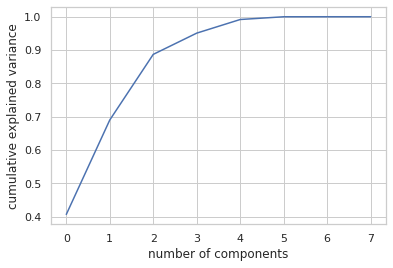

In [32]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [0]:
#PCA version additional testing ~62% accuracy
X = finalDf2.loc[:, finalDf2.columns != 'liquor_category_WHISKY']
y = finalDf2.loc[:, finalDf2.columns == 'liquor_category_WHISKY']

#non PCA version additional testing ~83 accuracy
#X = data_final2.loc[:, data_final2.columns != 'liquor_category_WHISKY']
#y = data_final2.loc[:, data_final2.columns == 'liquor_category_WHISKY']

#X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=1, random_state=0)

In [0]:
# Returns a NumPy Array
predictions = logisticRegr.predict(X)

In [35]:
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [36]:
y

,liquor_category_WHISKY
0,0
1,0
2,0
3,0
4,0
...,...
49995,0
49996,0
49997,0
49998,0


In [37]:
# Use score method to get accuracy of model
score = logisticRegr.score(X, y)
print(score)

0.50546


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y, predictions)
print("Confusion Matrix: ", '\n', cm)

Confusion Matrix:  
 [[24265 14715]
 [10012  1008]]


Logistic: f1=0.075 auc=0.148


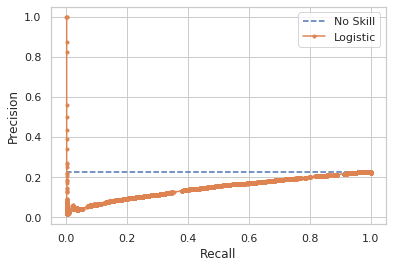

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
lr_probs = logisticRegr .predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logisticRegr .predict(X)
lr_precision, lr_recall, _ = precision_recall_curve(y, lr_probs)
lr_f1, lr_auc = f1_score(y, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]
no_skill = ycnt.values[0] / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Advantages  [10 points] 
Discuss the advantages of each model for each classification task. Does one
type of model offer superior performance over another in terms of prediction accuracy? In
terms of training time or efficiency? Explain in detail.  
 


###  Interpret  [30 points] 
Use the weights from logistic regression to interpret the importance of different
features for the classification task. Explain your interpretation in detail. Why do you think
some variables are more important? 

In [77]:
# interpret the weights

# iterate over the coefficients
weights2 = logisticRegr.coef_.T # take transpose to make a column vector
variable_names = X.columns
for coef, name in zip(weights2,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

sale_dollars_trans has weight of 0.3975814572685766
cost_per_liter has weight of -0.27602604523630525
cost_per_liter_trans has weight of 0.5460868247010998
state_bottle_cost_trans has weight of 1.0926470647898838
bottles_sold_trans has weight of -0.3590451588582654
volume_sold_liters_trans has weight of -0.009135392595894042
pack has weight of 0.06394489037279467
bottle_volume_ml has weight of -0.3854008832280231


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt


# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,data_final.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.8335
[[14540   986]
 [ 2344  2130]]
bottle_volume_ml has weight of -1.0769091958181831
bottles_sold_trans has weight of -0.6846158911873645
cost_per_liter has weight of -0.20392635618122948
cost_per_liter_trans has weight of 0.07051458283018193
volume_sold_liters_trans has weight of 0.30993826105918487
pack has weight of 0.42822051434978786
sale_dollars_trans has weight of 0.4282374309700872
state_bottle_cost_trans has weight of 2.1493828097599277


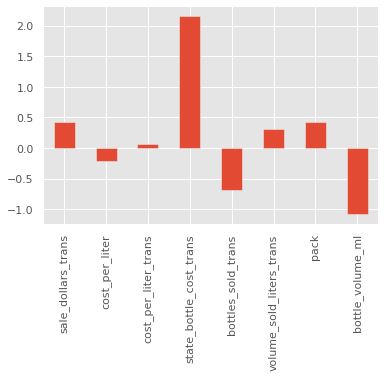

In [79]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=X.columns)
weights.plot(kind='bar')
plt.show()

### Insight into the data [10 points]
Look at the chosen support vectors for the classification task. Do these provide
any insight into the data? Explain. If you used stochastic gradient descent (and therefore did
not explicitly solve for support vectors), try subsampling your data to train the SVC model—
then analyze the support vectors from the subsampled dataset. 

In [74]:
#view support vectors
model.support_vectors_

array([[ 0.04172852,  0.3721708 ,  1.1229617 , ..., -0.66089127,
        -0.70389697, -0.26280584],
       [ 0.68132163,  0.0737954 ,  0.68644563, ...,  0.13752377,
        -0.02330599, -0.26280584],
       [ 0.89149549,  0.04219618,  0.62906725, ...,  0.34659634,
        -0.70389697,  0.27676159],
       ...,
       [ 1.02543744,  0.39064988,  1.14532376, ...,  0.13752377,
        -0.70389697, -0.26280584],
       [ 0.19106698, -0.39877606, -0.7808375 , ...,  0.64126757,
        -0.02330599, -0.26280584],
       [ 0.68979404,  0.08020147,  0.69774358, ...,  0.13752377,
        -0.70389697, -0.26280584]])

In [75]:
# View indicies of support vectors
model.support_

array([    0,     9,    11, ..., 79980, 79984, 79987], dtype=int32)

This chooses all the misclassified items as a support vectors.

In [76]:
#view number of support vectors for each class
model.n_support_

array([14457, 14435], dtype=int32)

We used 14,000 instances of Whiskey and Nonwhiskey to build our decision boundary.

[[-0.61779238  0.01725721 -0.26736576  1.74130624  0.93580436 -0.34449688
   0.05279718 -0.32864875]]


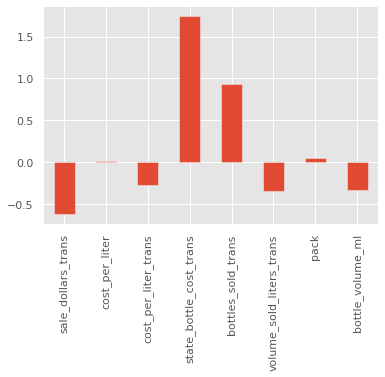

In [131]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(model.coef_)
weights3 = pd.Series(model.coef_[0],index=X_train.columns)
weights3.plot(kind='bar')

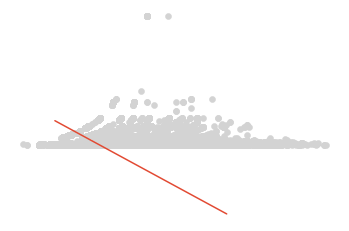

In [91]:
# Plot data points and color using their class
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_std[:,0], X_std[:,1], c=color)

# Create the hyperplane
w = svclassifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svclassifier.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();